### Training the Custom Dataset with YOLOV8

Using YOLOv8 to detect custom license plate dataset

In [1]:
!pip install ultralytics --quiet

Viewing the yaml file within the detection model

In [2]:
import os

directory = os.getcwd()
print(directory)

/Users/sarthakshrestha


In [4]:
%cd /Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3

/Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3


In [5]:
!ls

README.dataset.txt  runs                valid
README.roboflow.txt test                yolov8n.pt
data.yaml           train               yolov8s.pt


In [6]:
cat data.yaml

names:
- license-plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-detection-only
  url: https://universe.roboflow.com/college-fyp-ewmvi/license-plate-detection-only/dataset/3
  version: 3
  workspace: college-fyp-ewmvi
test: ../../License-Plate-Detection-Only-3/test/images
train: ../../License-Plate-Detection-Only-3/train/images
val: ../../License-Plate-Detection-Only-3/valid/images


As from the nc it gives out 1, which means that there's only 1 class, and that is labeled as 
`license-plate`

In [7]:
from ultralytics import YOLO

from IPython.display import Image

In [9]:
print(os.getcwd())

/Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3


In [10]:
%cd runs/detect/train2/weights/

/Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3/runs/detect/train2/weights


In [27]:
!ls
model_directory = "/Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3/runs/detect/train2"

best.pt last.pt runs


In [12]:
model = YOLO('best.pt')

In [30]:
import matplotlib.pyplot as plt

source_image = "/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png"

results = model.predict(source=source_image, show=False, save=True)
img = plt.imread(source_image)
saved_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/license-detection-model/content/datasets/License-Plate-Detection-Only-3/runs/detect/train2/weights/runs/detect/predict2/"



image 1/1 /Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png: 384x640 3 license-plates, 200.7ms
Speed: 27.3ms preprocess, 200.7ms inference, 19.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


In [28]:
import matplotlib.image as mpimg


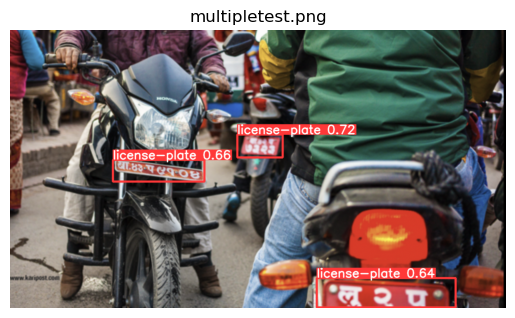

In [31]:
image_files = [file for file in os.listdir(saved_path) if file.endswith(('.jpg', '.png'))]
for image_file in image_files:
    img_path = os.path.join(saved_path, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')  
    plt.show()